In [1]:
# hackathon

In [72]:
import pandas as pd
import numpy as np
import math
import bokeh
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import Figure
from bokeh.embed import components, file_html, json_item
from bokeh.layouts import row, column
from bokeh.models import CategoricalColorMapper, ColumnDataSource, MultiSelect, HoverTool
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
import matplotlib.pyplot as plt
import matplotlib as mpl

In [86]:
# define functions
# matplotlib params 
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"   
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5

# matplotlib adjustments
def default_plot(ax, spines): 
    ax = plt.gca()
    # Remove unnecessary axes and ticks (top and bottom)
    ax.spines["top"].set_visible(False)   
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    
    # Set the ticks facing OUTWARD
    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')
    
    # Remove grid
    #ax.grid('off')
    
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
        
    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')

    return ax


In [74]:
leave = pd.read_csv('C:/Users/Zaca/Documents/Datasets/equality/paid_leave.txt')
europe = pd.read_csv('C:/Users/Zaca/Documents/Datasets/equality/eu_countries.txt')
cols = ['country', 'mothers', 'fathers']
leave.columns = cols

In [75]:
europe.Countries = europe.Countries.str.replace('\t', '')
europe.columns = ['country']
europe

,country
0,Austria
1,Italy
2,Belgium
3,Latvia
4,Bulgaria
5,Lithuania
6,Croatia
7,Luxembourg
8,Cyprus
9,Malta


In [76]:
leave.sort_values('fathers', ascending= False)

,country,mothers,fathers
31,Japan,36,30
32,Republic of Korea,25,17
4,Portugal,20,12
0,Sweden,35,10
8,Luxembourg,26,10
1,Norway,45,9
2,Iceland,16,7
10,Austria,51,6
5,Germany,43,5
9,France,19,5


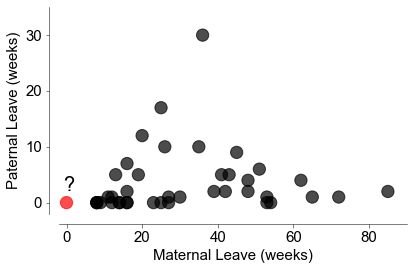

In [126]:
c_list = ['United States']
leave['colors'] = np.where(leave.country.isin(c_list), 'r', 'k')

ax, fig = plt.subplots()
ax = default_plot(ax, ['left', 'bottom'])
plt.xlim(-2, 90)
plt.ylim(-2, 35)
plt.scatter(leave.mothers, leave.fathers, s=150, alpha=0.7, c=leave.colors)
plt.ylabel('Paternal Leave (weeks)')
plt.xlabel('Maternal Leave (weeks)')
plt.text(-1, 2, '?', size=20)
plt.tight_layout()
plt.savefig('country_scatter1.png', dpi=600)

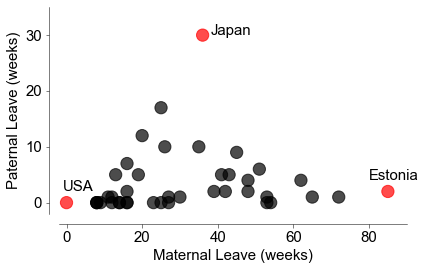

In [120]:
c_list = ['United States', 'Japan', 'Estonia']
leave['colors'] = np.where(leave.country.isin(c_list), 'r', 'k')

ax, fig = plt.subplots()
ax = default_plot(ax, ['left', 'bottom'])
plt.xlim(-2, 90)
plt.ylim(-2, 35)
plt.scatter(leave.mothers, leave.fathers, s=150, alpha=0.7, c=leave.colors)
plt.ylabel('Paternal Leave (weeks)')
plt.xlabel('Maternal Leave (weeks)')
plt.tight_layout()
plt.text(-1, 2, 'USA')
plt.text(38, 30, 'Japan')
plt.text(80, 4, 'Estonia')
plt.savefig('country_scatter2.png', dpi=600)

In [78]:
#Creating our data arrays used for plotting the line plot

paternity = leave.loc[leave.fathers > 0].sort_values(by='fathers', ascending=False)

x = paternity.country
y = paternity.fathers

mapper = linear_cmap(field_name=y, palette=Spectral6 ,low=min(y) ,high=max(y))
#Calling the figure() function to create the figure of the plot

plot = Figure(x_range= x)

plot.xaxis.major_label_orientation = math.pi/2

#Creating a line plot using the line() function

plot.vbar(x, top=y, width= 0.85)

#Output the plot 

#output_file('line_plot.html')
output_notebook()

show(plot)

Loading BokehJS ...

In [6]:
script, div = components(plot)

In [7]:
print(script)
print(div)


<script type="text/javascript">
  (function() {
    var fn = function() {
      Bokeh.safely(function() {
        (function(root) {
          function embed_document(root) {
            
          var docs_json = '{"269f616b-7f0e-47c2-8989-d12e5a468858":{"roots":{"references":[{"attributes":{"callback":null,"factors":["Japan","Republic of Korea","Portugal","Sweden","Luxembourg","Norway","Iceland","Austria","Germany","France","Finland","Belgium","Romania","Lithuania","Poland","Croatia","Spain","Slovenia","Estonia","Bulgaria","Latvia","Hungary","Denmark","Chile","Mexico","Turkey"]},"id":"1003","type":"FactorRange"},{"attributes":{"text":""},"id":"1040","type":"Title"},{"attributes":{"callback":null,"data":{"top":[30,17,12,10,10,9,7,6,5,5,5,5,4,4,2,2,2,2,2,1,1,1,1,1,1,1],"x":["Japan","Republic of Korea","Portugal","Sweden","Luxembourg","Norway","Iceland","Austria","Germany","France","Finland","Belgium","Romania","Lithuania","Poland","Croatia","Spain","Slovenia","Estonia","Bulgaria","Latv

In [16]:
europe_leave = europe.merge(leave, on='country', how='inner')

In [21]:
europe_leave.fathers

0      6
1      0
2      5
3      1
4      1
5      4
6      2
7     10
8      0
9      0
10     0
11     1
12     2
13     2
14    12
15     5
16     4
17     5
18     0
19     5
20     2
21     0
22     2
23     1
24    10
Name: fathers, dtype: int64

In [25]:
parlament = pd.read_csv('C:/Users/Zaca/Documents/Datasets/equality/parliament.csv')

In [68]:
women_in_government = parlament[[str(x) for x in range(1997, 2020)]].mean(axis=0)
women_in_government

1997    10.214772
1998    10.891795
1999    11.342696
2000    11.778336
2001    12.159762
2002    13.425340
2003    13.786904
2004    14.387893
2005    15.244971
2006    15.565126
2007    16.571801
2008    16.806665
2009    17.409699
2010    17.470631
2011    18.225953
2012    19.121584
2013    19.914626
2014    20.239834
2015    20.761605
2016    20.936711
2017    21.524293
2018    21.930603
2019    22.664093
dtype: float64

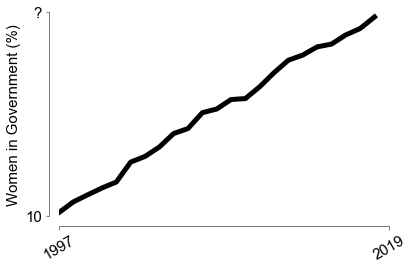

In [102]:
ax, fig = plt.subplots()
ax = default_plot(ax, ['left', 'bottom'])
plt.xlim(0, len(women_in_government))
plt.ylabel('Women in Government (%)')
plt.ylim(10, 23)
plt.xticks([0, len(women_in_government)], ['1997', '2019'], rotation=30);
plt.yticks([10, 23], ['10', '?'])
plt.plot(women_in_government.values, color='k', lw=5);
plt.tight_layout()
plt.savefig('goverment1.png', dpi=600)

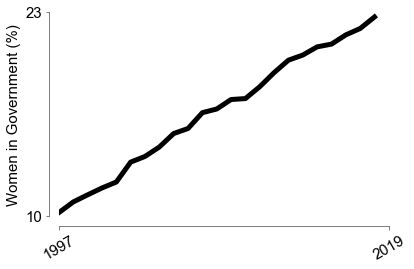

In [103]:
ax, fig = plt.subplots()
ax = default_plot(ax, ['left', 'bottom'])
plt.xlim(0, len(women_in_government))
plt.ylabel('Women in Government (%)')
plt.ylim(10, 23)
plt.xticks([0, len(women_in_government)], ['1997', '2019'], rotation=30);
plt.yticks([10, 23])
plt.plot(women_in_government.values, color='k', lw=5);
plt.tight_layout()
plt.savefig('goverment2.png', dpi=600)

Learn more at https://www.unwomen.org/en/what-we-do/leadership-and-political-participation/facts-and-figures

1997    10.214772
1998    10.891795
1999    11.342696
2000    11.778336
2001    12.159762
2002    13.425340
2003    13.786904
2004    14.387893
2005    15.244971
2006    15.565126
2007    16.571801
2008    16.806665
2009    17.409699
2010    17.470631
2011    18.225953
2012    19.121584
2013    19.914626
2014    20.239834
2015    20.761605
2016    20.936711
2017    21.524293
2018    21.930603
2019    22.664093
dtype: float64

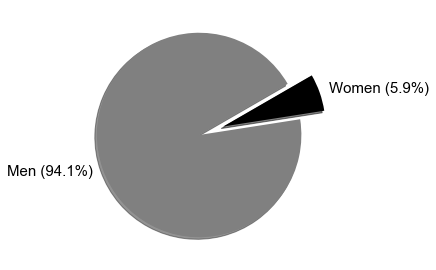

In [150]:
m_nobel = 866/920
w_nobel = 54/920
colors = ['gray', 'black']
ratios = [m_nobel, w_nobel]
plt.figure()
plt.pie(ratios, explode=[0, 0.25], labels=['Men (94.1%)', 'Women (5.9%)'], shadow=True, startangle= 30, colors=colors)
plt.tight_layout()
plt.savefig('nobel_prize.png', dpi=600)

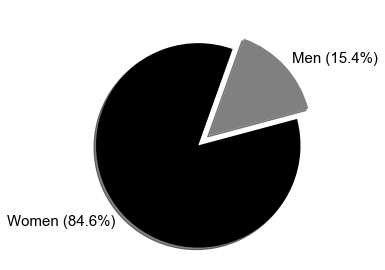

In [155]:
m_violence = 3629/23600
w_violence = 19971/23600
colors = ['gray', 'black']
ratios = [m_violence, w_violence]
plt.figure()
plt.pie(ratios, explode=[0, 0.15], labels=['Men (15.4%)', 'Women (84.6%)'], shadow=True, startangle= 15, colors=colors)
plt.tight_layout()
plt.savefig('domestic_violence.png', dpi=600)

In [159]:
portugal = pd.read_csv('C:/Users/Zaca/Documents/Datasets/equality/portugal_wage.csv')

In [160]:
portugal

,LOCATION,TIME,Value
0,PRT,2004,13.030304
1,PRT,2005,15.966388
2,PRT,2006,14.354839
3,PRT,2007,15.277780
4,PRT,2008,15.635483
5,PRT,2009,13.792501
6,PRT,2010,13.450867
7,PRT,2011,15.248123
8,PRT,2012,16.315465
9,PRT,2013,16.666666


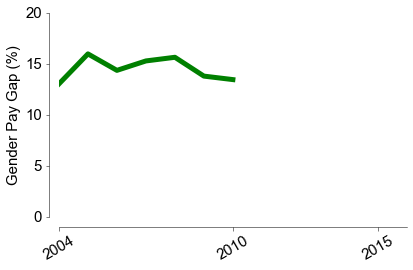

In [172]:
ax, fig = plt.subplots()
ax = default_plot(ax, ['left', 'bottom'])
plt.xlim(0, len(portugal))
plt.ylabel('Gender Pay Gap (%)')
plt.ylim(0, 20)
plt.xticks([0, 6, 11], ['2004', '2010', '2015'], rotation=30);
#plt.yticks([10, 23], ['10', '?'])
plt.plot(korea.Value[:7], color='g', lw=5);
plt.tight_layout()
plt.savefig('pay_gap1.png', dpi=600)

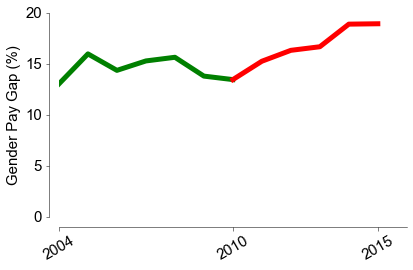

In [171]:
ax, fig = plt.subplots()
ax = default_plot(ax, ['left', 'bottom'])
plt.xlim(0, len(portugal))
plt.ylabel('Gender Pay Gap (%)')
plt.ylim(0, 20)
plt.xticks([0, 6, 11], ['2004', '2010', '2015'], rotation=30);
#plt.yticks([10, 23], ['10', '?'])
plt.plot(korea.Value[:7], color='g', lw=5);
plt.plot(korea.Value[6:], color='r', lw=5);
plt.tight_layout()
plt.savefig('pay_gap2.png', dpi=600)

In [173]:
wage_gap = pd.read_csv('C:/Users/Zaca/Documents/Datasets/equality/wage_gap_2014.csv')

In [176]:
iso_dict = {'AUS':'Australia', 'AUT':'Austria', 'BEL', 'Belgium', 'CAN':'Canada', 'CZE':'Czech Republic', 
            'DNK':'Denmark', 'FIN':'Finland', 'DEU':'Germany', 'GRC':'Greece', 'HUN':'Hungary', 'ISL':'Iceland',
            'IRL':'Ireland', 'ITA':'Italy', 'JPN':'Japan', 'KOR':'Republic of Korea', }
wage_gap

,LOCATION,TIME,Value
0,AUS,2014,15.384615
1,AUT,2014,17.728884
2,BEL,2014,3.298900
3,CAN,2014,19.229000
4,CZE,2014,16.254560
5,DNK,2014,6.323866
6,FIN,2014,19.609079
7,DEU,2014,17.079531
8,GRC,2014,9.090908
9,HUN,2014,3.772606
